# Fase 4: Busca de Parâmetros

Nesta fase iremos aprofundar a busca de hiperparamewtros, variabndo os parametros ca cada modelos, e compaerandos seus resultados

O primeiro passo que iremos fazer é importar as bibliotecas principais, e estabelecer o ambiente de execução.


In [1]:
# Bibliotecas Externas
import os
import warnings
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

# Ignorando Warnings
warnings.filterwarnings("ignore")

# Bibliotecas Locais
os.chdir("../..")
from lib import plots, runner, util

# Definido Variáveis globais
N_SPLITS = 5
RANDOM_STATE = 51

## 0. Importando os Dados

Nosso primero é coletar os dados que preparamos na etapa anterior, para verificar como esses dados se comportam

In [2]:
# Conjunto de treino
X_train = pd.read_csv('./data/processed/X_train.csv')
Y_train = pd.read_csv('./data/processed/Y_train.csv')

Y_train['class'] = Y_train['class'].apply(lambda val: 1 if val == 'UP' else 0)

# Conjunto de validação
X_val = pd.read_csv('./data/processed/X_val.csv')
Y_val = pd.read_csv('./data/processed/Y_val.csv')


Y_val['class'] = Y_val['class'].apply(lambda val: 1 if val == 'UP' else 0)

# Conjunto de teste
X_test = pd.read_csv('./data/processed/X_test.csv')
Y_test = pd.read_csv('./data/processed/Y_test.csv')

Y_test['class'] = Y_test['class'].apply(lambda val: 1 if val == 'UP' else 0)

## 1. Algoritmos de Machine Learning para Classificação

### Decision Tree

In [3]:
dt = DecisionTreeClassifier(
    random_state=RANDOM_STATE
)

In [4]:
param_distributions_dt = {
    'max_depth': [1, 2, 5, 10, 50, 100],
    'min_samples_split': [2, 3, 5, 7, 10, 20, 50, 100],
    'min_samples_leaf': [1, 2, 3, 5, 7, 20, 50, 100] 
}

In [5]:
df_dt, model_dt, results_dt, _  = runner.search_params(
    model=dt,
    params=param_distributions_dt,
    X_train=X_train,
    Y_train=Y_train,
    X_val=X_val,
    Y_val=Y_val,
    model_name = 'decision_tree',
    max_combinations=100,
    load_existing_model=False,
    save = True
)
util.show_results(results_dt)

Resultados do Modelo: decision_tree

Tempo da Busca de Parâmetros: 11.304s
Melhores Parâmetros Encontrados: {'min_samples_split': 7, 'min_samples_leaf': 3, 'max_depth': 50}

Tempo de Treinamento: 11.304s
Média de Memória Utilizada: 2.34 MB
Pico de Memória Utilizada: 3.55 MB


In [6]:
df_dt

,K,F1_Score_train,Recall_train,AUC_train,Accuracy_train,FPR_train,TPR_train,F1_Score_test,Recall_test,AUC_test,Accuracy_test,FPR_test,TPR_test
0,0,0.952311,0.947407,0.958524,0.96035,"[0.0, 0.030359028511087644, 1.0]","[0.0, 0.9474071349760942, 1.0]",0.822893,0.819161,0.846951,0.851303,"[0.0, 0.12525837122778008, 1.0]","[0.0, 0.8191609977324263, 1.0]"


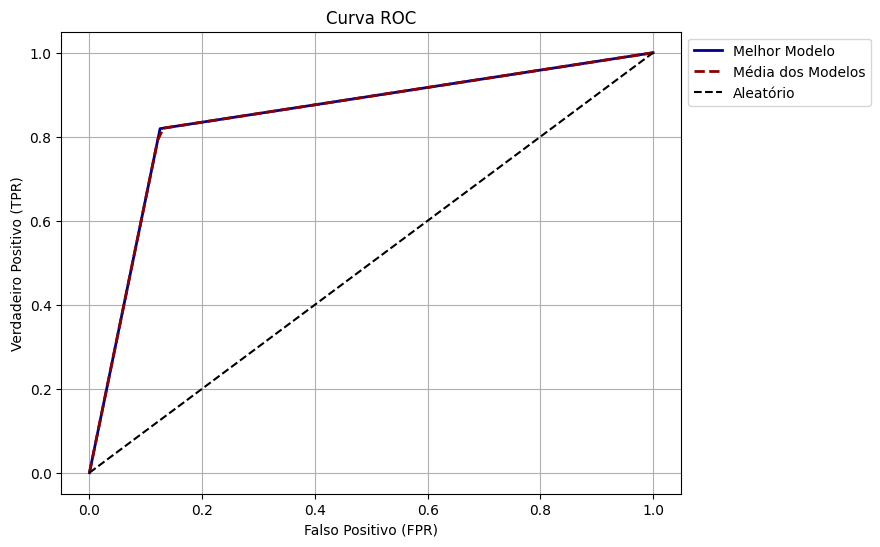

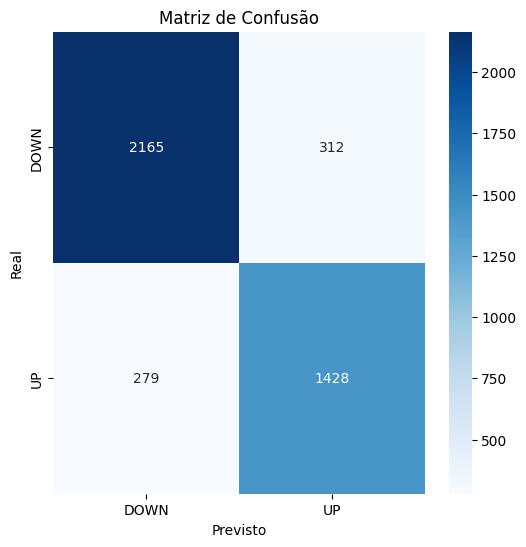

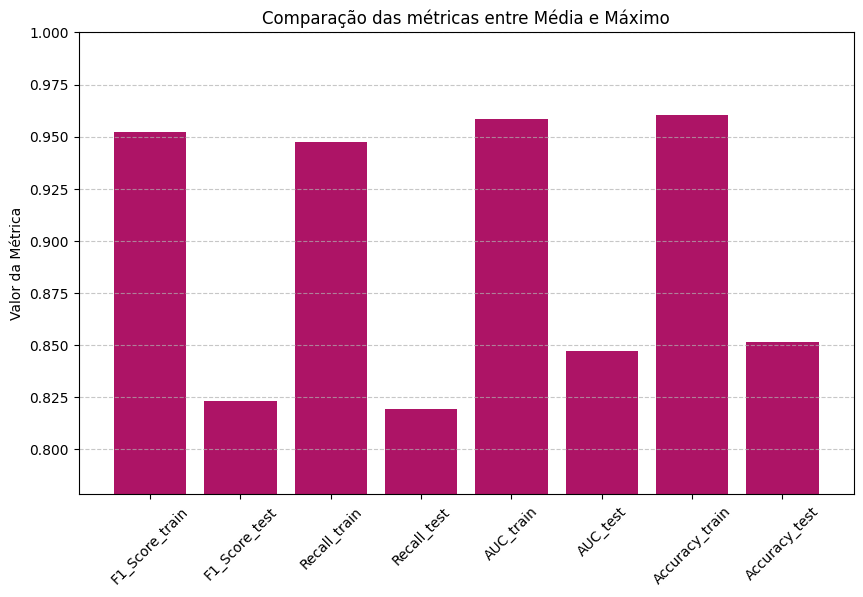

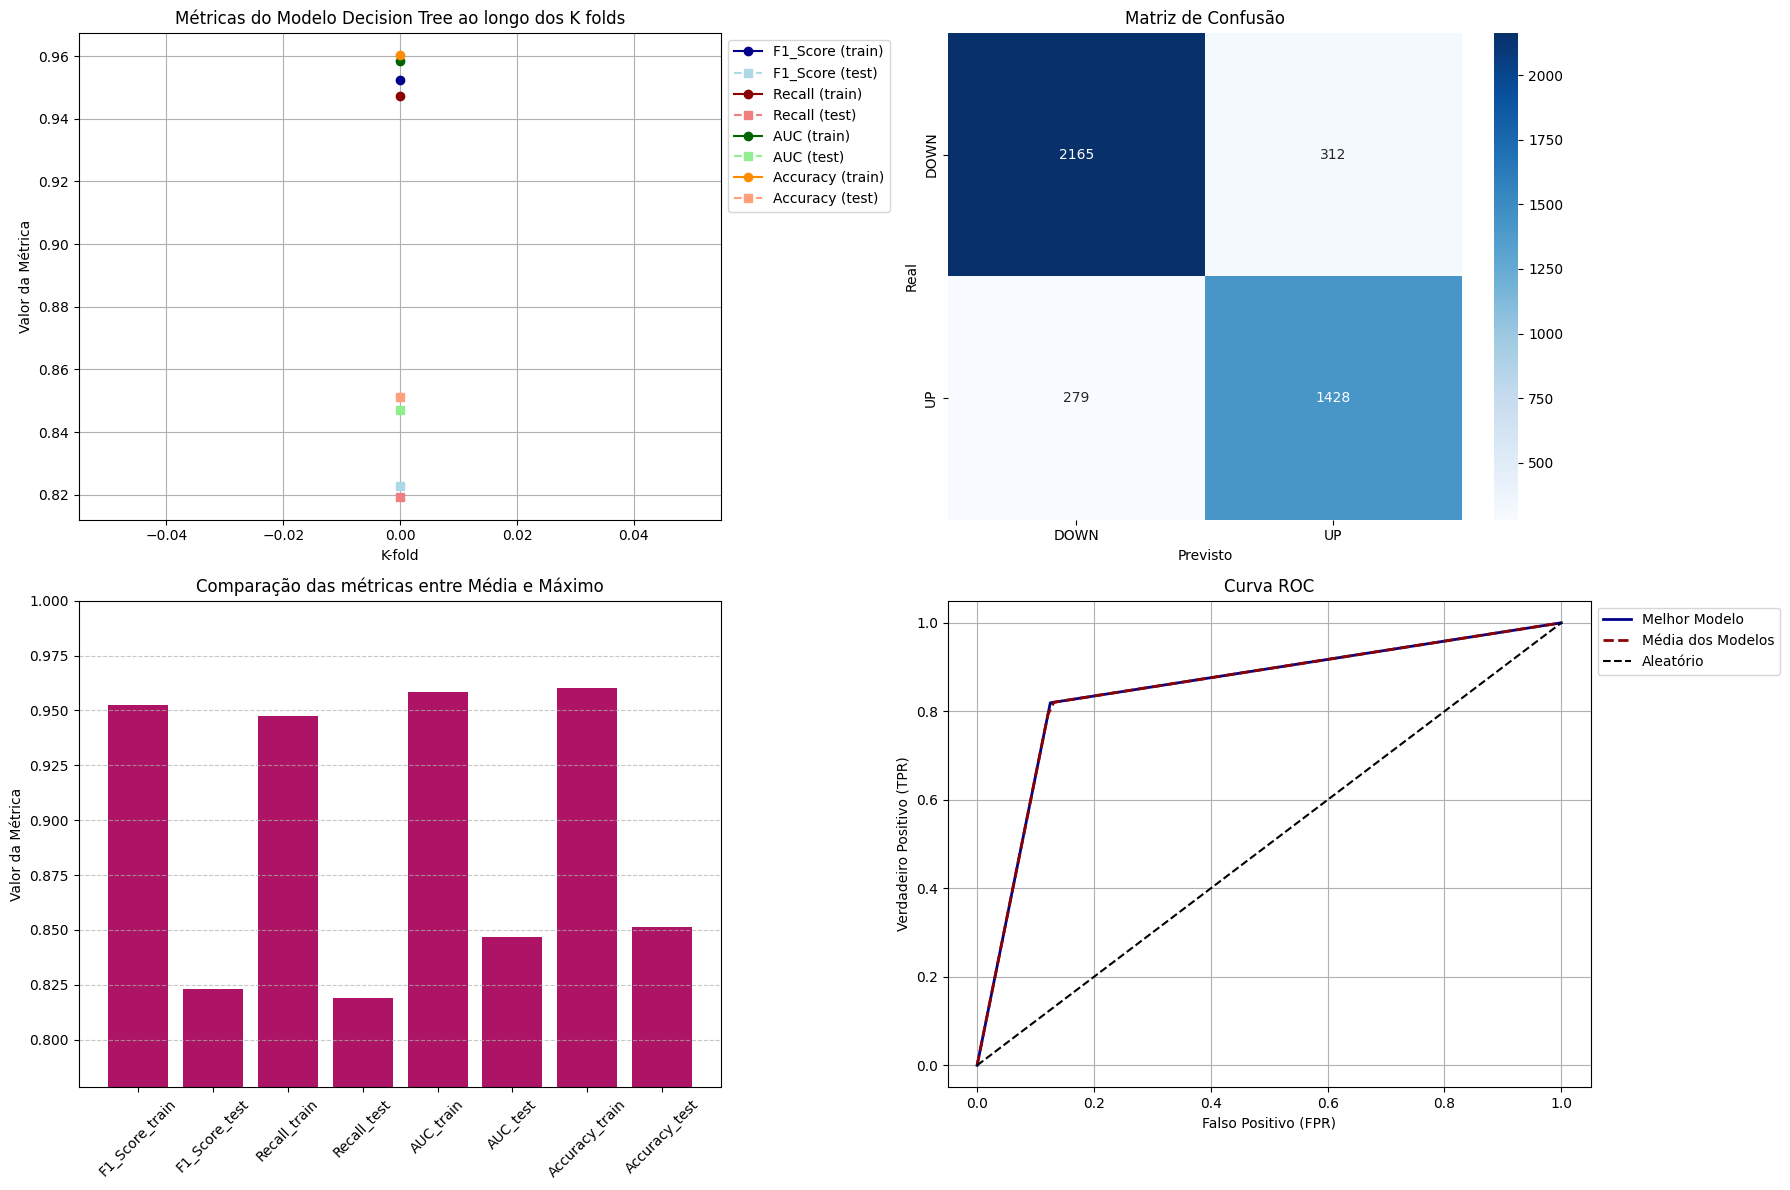

In [ ]:
plots.show_roc(df_dt)
plots.show_confusion_matrix(model_dt, X_test, Y_test)
plots.show_bar_metrics(df_dt)

In [10]:
X_test

,date,day,period,nswprice,nswdemand,vicprice,vicdemand,transfer
0,0.451661,3,0.893617,0.038609,0.662154,0.002582,0.542724,0.615351
1,0.893633,7,0.851064,0.069563,0.622285,0.004501,0.463231,0.725439
2,0.456307,4,0.680851,0.034016,0.551622,0.002293,0.547903,0.554825
3,0.451484,6,0.489362,0.043083,0.703660,0.002912,0.645520,0.525877
4,0.473519,3,0.446809,0.027861,0.566052,0.001851,0.545572,0.415789
...,...,...,...,...,...,...,...,...
4179,0.893677,1,0.617021,0.039630,0.333978,0.002553,0.363801,0.656140
4180,0.968895,1,0.468085,0.045244,0.430527,0.002009,0.315381,0.600000
4181,0.451971,3,0.617021,0.033626,0.556531,0.002287,0.579751,0.339474
4182,0.893722,2,0.638298,0.029512,0.512943,0.002000,0.544019,0.372368


In [ ]:
X_train.columns

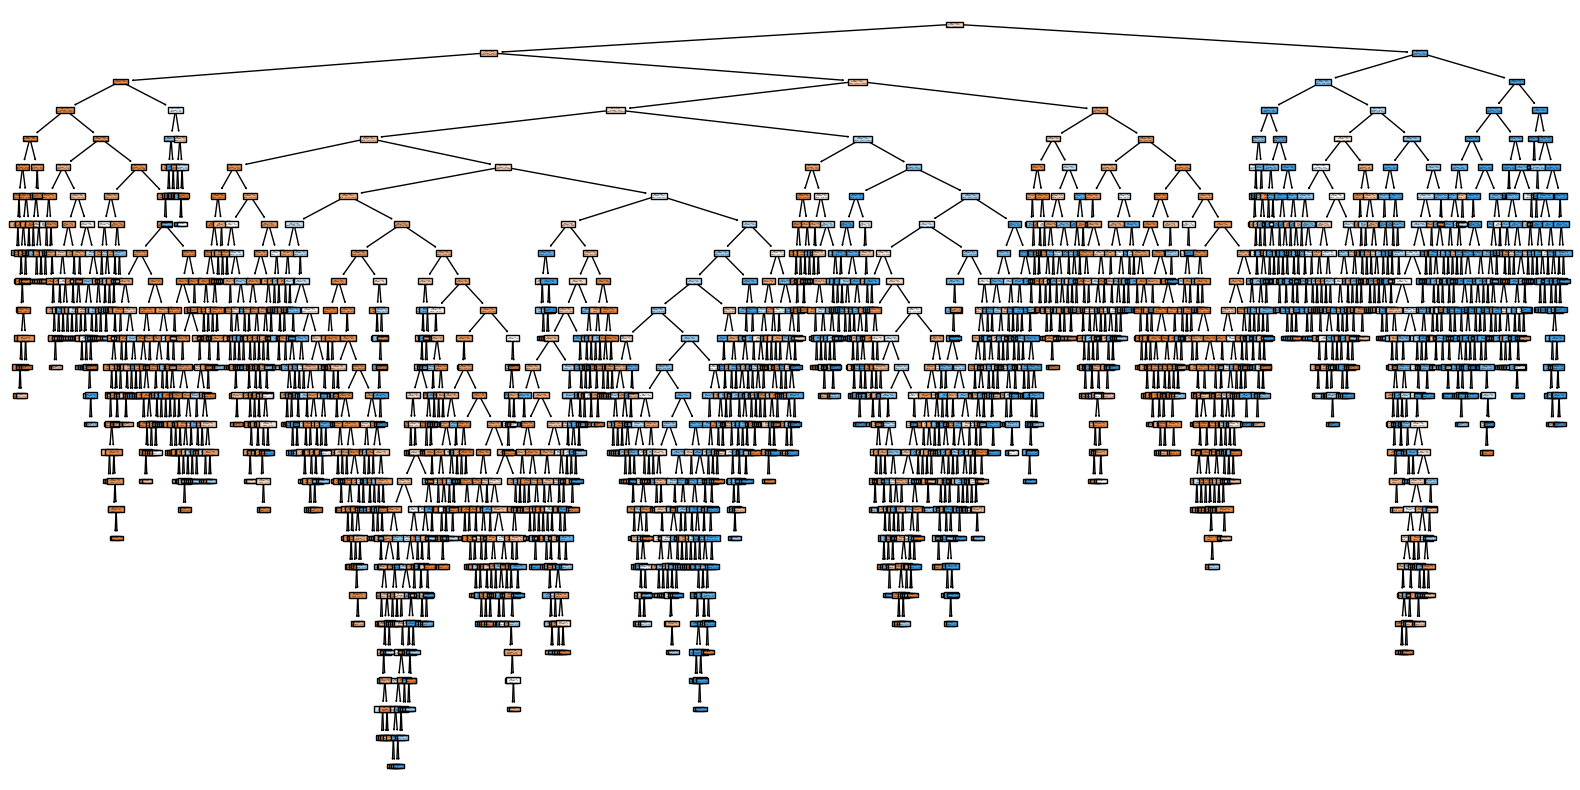

In [13]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))  # Ajuste o tamanho da figura conforme necessário
plot_tree(model_dt, filled=True, feature_names=X_train.columns) #feature_names é o nome das colunas de atributos
plt.show()